In [14]:
import os
from timingsimulator import TimingSim
import matplotlib.pyplot as plt

## Custom config

In [15]:
# default config
class config:
    parameters = {'dataQueueDepth': '4', 
                  'computeQueueDepth': '4', 
                  'vdmNumBanks': '16', 
                  'vlsPipelineDepth': '11', 
                  'vdmBankBusyTime': '2', 
                  'numLanes': '4', 
                  'pipelineDepthMul': '12', 
                  'pipelineDepthAdd': '2', 
                  'pipelineDepthDiv': '8', 
                  'pipelineDepthShuffle': '5'}

## Make trace

In [16]:
def getTrace(dir):
    iodir = os.path.abspath(dir)
    print("IO Directory:", iodir)
    
    # get trace
    # print("Running func simulator...")
    os.system(f'python3 funcsimulator.py -t --iodir "{iodir}" > out.txt')
    # print("Saved output of func simulator in out.txt")
    
    tracefp = os.path.abspath(os.path.join(iodir, "trace.asm"))
    return tracefp

In [17]:
trace_s = getTrace("dot_product_shuffling/")
trace_uo = getTrace("dot_product_unoptimized/")
trace_o = getTrace("dot_product_optimized/")

IO Directory: /Users/gauravk/Documents/Vector-Computer-Project/dot_product_shuffling
IO Directory: /Users/gauravk/Documents/Vector-Computer-Project/dot_product_unoptimized
IO Directory: /Users/gauravk/Documents/Vector-Computer-Project/dot_product_optimized


## Change in specific parameters (rest are default)

In [31]:
1722 / 1017

1.6932153392330382

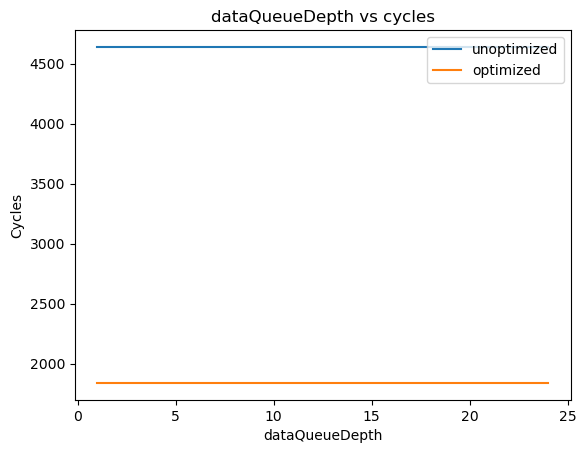

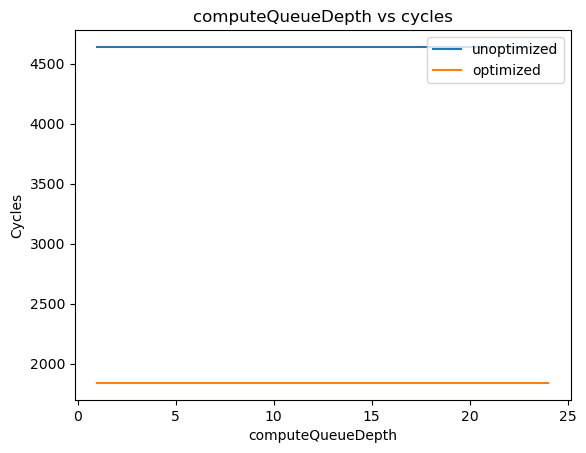

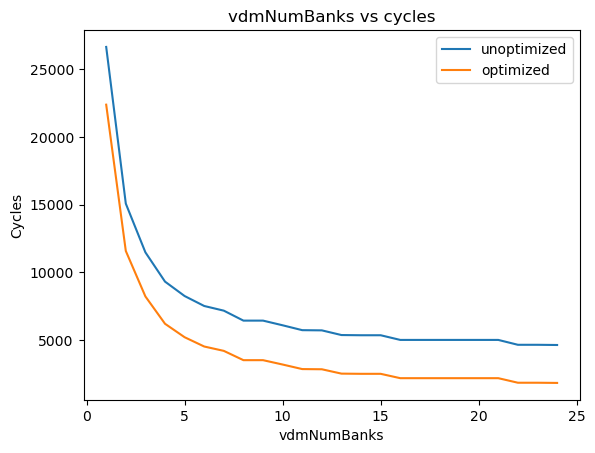

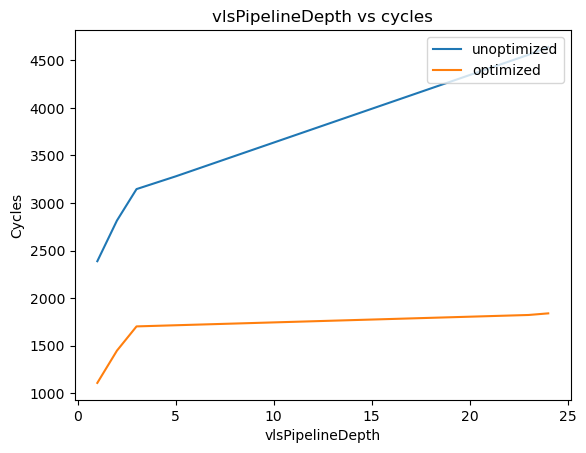

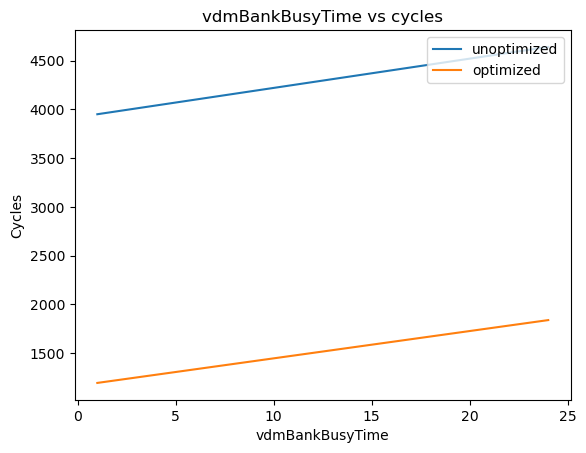

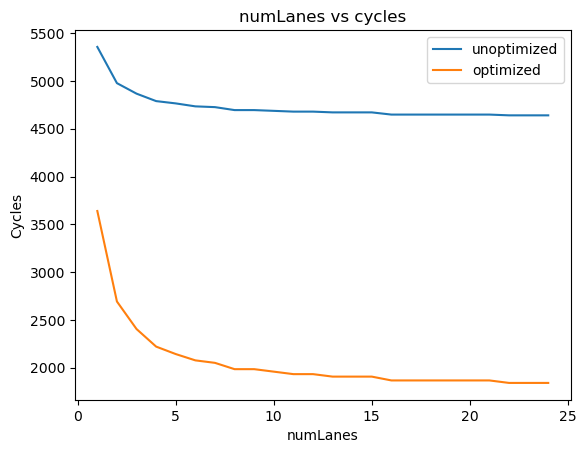

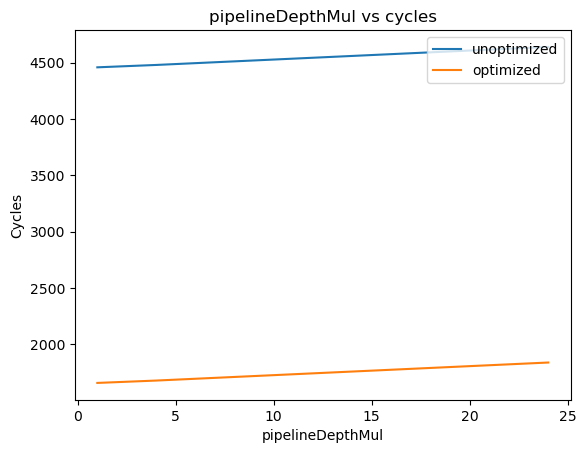

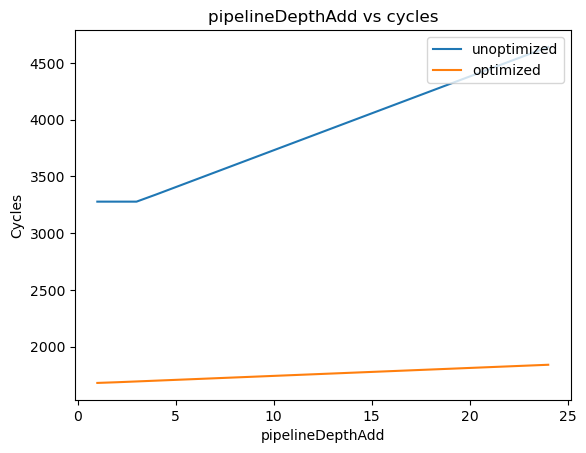

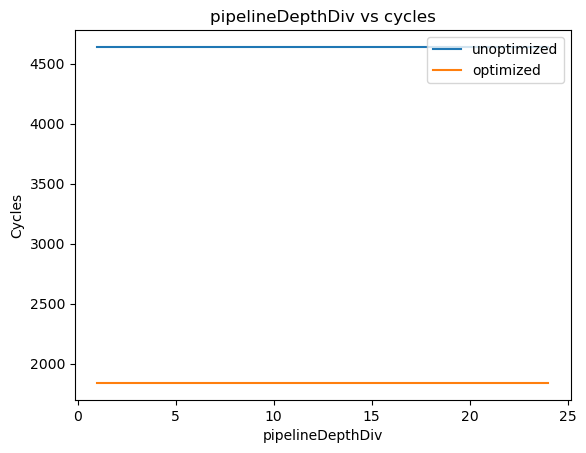

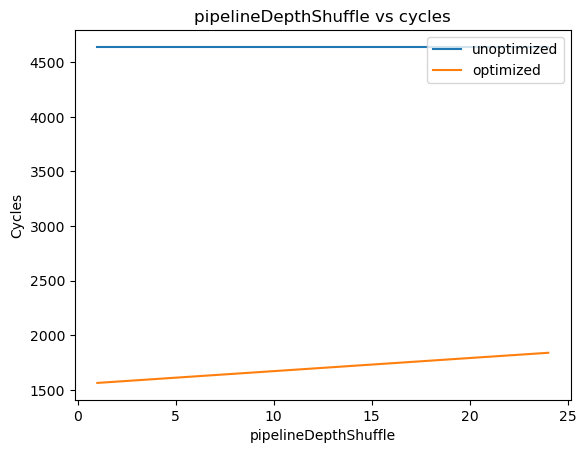

In [30]:
asm = "dot_prod"
for parameter_type in config.parameters: # {"numLanes"}:
    paramX = range(1, 25)
    cycles_uo = []
    cycles_o = []
    
    
    for x in paramX:        
        config.parameters[parameter_type] = x
        ts = TimingSim(trace_uo, config)
        # print("Running timing simulator...")
        ts.run()
        # print(f"Cycles: {ts.cyclesTaken()}")
        cycles_uo.append(ts.cyclesTaken())

        ts = TimingSim(trace_o, config)
        # print("Running timing simulator...")
        ts.run()
        # print(f"Cycles: {ts.cyclesTaken()}")
        cycles_o.append(ts.cyclesTaken())
    
    plt.plot(paramX, cycles_uo, label="unoptimized")
    plt.plot(paramX, cycles_o, label="optimized")

    

    plt.legend(loc="upper right")
    
    # naming the x axis
    plt.xlabel(parameter_type)
    # naming the y axis
    plt.ylabel('Cycles')
    
    # giving a title to my graph
    plt.title(f"{parameter_type} vs cycles")
    
    # function to show the plot
    plt.savefig(f"graphs/{asm}_{parameter_type}.png")
    plt.show()